In [2]:
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline

In [4]:
#read csv
csvData1 = pd.read_csv("./1106/feature_final_label/feature_final/brute_force_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #정상
csvData2 = pd.read_csv("./1106/feature_final_label/feature_final/ddos_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #악성
csvData3 = pd.read_csv("./1106/feature_final_label/feature_final/friday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData4 = pd.read_csv("./1106/feature_final_label/feature_final/thursday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData5 = pd.read_csv("./1106/feature_final_label/feature_final/thursday_feature3.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData6 = pd.read_csv("./1106/feature_final_label/feature_final/train_set1_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
# csvData7 = pd.read_csv("./1106/feature_final_label/feature_final/train_set2_split1_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
# csvData8 = pd.read_csv("./1106/feature_final_label/feature_final/train_set2_split2_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData9 = pd.read_csv("./1106/feature_final_label/feature_final/wednesday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)


In [5]:
csvData1=csvData1[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData2=csvData2[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData3=csvData3[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData4=csvData4[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData5=csvData5[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData6=csvData6[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
# csvData7=csvData7[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
#        'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
#        'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
#        'bw_pkt_s', 'label']]
# csvData8=csvData8[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
#        'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
#        'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
#        'bw_pkt_s', 'label']]
csvData9=csvData9[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]

In [6]:
#concat csv
csvData = pd.concat([csvData1,csvData2,csvData3,csvData4,csvData5,csvData6,csvData9])
dfData= pd.DataFrame(data=csvData)

In [7]:
#labels 떼기
feature = dfData[ ['fl_dur','tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot','fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot', 'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01','fw_pkt_s','bw_pkt_s']]
feature.isnull().sum()
feature.shape

(308347, 15)

In [8]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(feature)
feature = scaler.fit_transform(feature)  #스케일된 dataset
feature.shape

(308347, 15)

In [8]:
print(feature)

[[4.77328469e-04 8.54700855e-05 1.21083484e-04 ... 8.26446281e-03
  1.55617803e-04 1.94522253e-04]
 [4.29595622e-04 8.54700855e-05 1.21083484e-04 ... 8.26446281e-03
  2.33426704e-04 2.33426704e-04]
 [0.00000000e+00 4.27350427e-05 3.56127893e-05 ... 8.26446281e-03
  2.33426704e-04 2.33426704e-04]
 ...
 [5.85989261e-02 2.02371795e-01 1.48747498e-01 ... 8.26446281e-03
  1.28384687e-03 9.72611267e-04]
 [2.39078890e-04 4.27350427e-05 4.27353471e-05 ... 8.26446281e-03
  1.16713352e-04 1.16713352e-04]
 [2.39213448e-04 4.27350427e-05 3.56127893e-05 ... 8.26446281e-03
  1.55617803e-04 1.16713352e-04]]


In [9]:
# k-means

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0).fit(feature)

# pickle.dump(kmeans,open("kmeans1107.pkl","wb"))

dfData['cluster']=kmeans.labels_

# pickle.dump(kmeans,open("kmeans1107.pkl","wb"))



In [10]:
dfData

,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s,label,cluster
0,10.000000,11,17,10.0,44415.909091,1.414214,4.0,0.0,10.0,44417.000000,1.053269,3.0,0.0,3,4,1,1
1,9.000000,11,17,9.0,44405.272727,1.374773,3.0,0.0,9.0,44406.235294,1.170937,3.0,0.0,5,5,1,1
2,0.000000,5,5,0.0,44466.000000,0.000000,0.0,0.0,0.0,44466.000000,0.000000,0.0,0.0,5,5,1,1
3,4.000000,6,6,4.0,44370.666667,1.600000,4.0,0.0,4.0,44370.833333,1.166190,3.0,0.0,5,4,1,1
4,10.000000,11,17,10.0,44397.090909,1.341641,3.0,0.0,10.0,44398.176471,1.165922,3.0,0.0,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,6.620403,5,6,7.0,64790.000000,1.479020,4.0,0.0,7.0,64791.833333,1.496663,4.0,0.0,2,3,6,1
4,5.017248,5,5,5.0,65404.800000,1.639360,4.0,0.0,5.0,65405.800000,1.639360,4.0,0.0,3,2,6,1
5,1227.643644,28412,20884,1227.0,66151.933444,0.205175,5.0,0.0,1227.0,66153.882111,0.237397,5.0,0.0,32,24,6,1
6,5.008687,5,6,4.0,65409.200000,1.224745,3.0,0.0,5.0,65410.666667,1.095445,3.0,0.0,2,2,6,1


cluster      0       1      2     3    4
label                                   
0            0  227692      0     0  220
1            0       0      0   117    0
4           35       0      0     0    0
5          821       0      0  1371    0
6            8       0      0     0    0
8            0       0     45  3596    0
9        40230       9  30702  3501    0


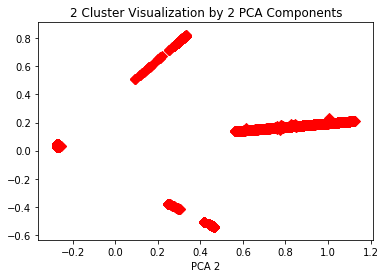

In [10]:
    from sklearn.decomposition import PCA

    pca= PCA(n_components=2)
    pca_transformed = pca.fit_transform(feature)

    dfData['pca_x']=pca_transformed[:, 0]
    dfData['pca_y']=pca_transformed[:, 1]

    marker0_ind = dfData[dfData['cluster']==0].index
    marker1_ind = dfData[dfData['cluster']==1].index

    plt.scatter(dfData['pca_x'],dfData['pca_y'],s=50,marker='D',c='r')
    ct = pd.crosstab(dfData['label'],dfData['cluster'])


    print(ct)
    # ct.to_csv("table.csv",index=False)


    plt.xlabel('PCA 1')
    plt.xlabel('PCA 2')
    plt.title('2 Cluster Visualization by 2 PCA Components')
    plt.show()

In [15]:
dfData

,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s,label,cluster,pca_x,pca_y
0,10.000000,11,17,10.0,44415.909091,1.414214,4.0,0.0,10.0,44417.000000,1.053269,3.0,0.0,3,4,1,1,0.586654,0.140378
1,9.000000,11,17,9.0,44405.272727,1.374773,3.0,0.0,9.0,44406.235294,1.170937,3.0,0.0,5,5,1,1,0.586446,0.140350
2,0.000000,5,5,0.0,44466.000000,0.000000,0.0,0.0,0.0,44466.000000,0.000000,0.0,0.0,5,5,1,1,0.587617,0.140490
3,4.000000,6,6,4.0,44370.666667,1.600000,4.0,0.0,4.0,44370.833333,1.166190,3.0,0.0,5,4,1,1,0.585767,0.140252
4,10.000000,11,17,10.0,44397.090909,1.341641,3.0,0.0,10.0,44398.176471,1.165922,3.0,0.0,3,4,1,1,0.586288,0.140330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,6.620403,5,6,7.0,64790.000000,1.479020,4.0,0.0,7.0,64791.833333,1.496663,4.0,0.0,2,3,6,1,0.982450,0.191990
4,5.017248,5,5,5.0,65404.800000,1.639360,4.0,0.0,5.0,65405.800000,1.639360,4.0,0.0,3,2,6,1,0.994386,0.193538
5,1227.643644,28412,20884,1227.0,66151.933444,0.205175,5.0,0.0,1227.0,66153.882111,0.237397,5.0,0.0,32,24,6,1,1.008860,0.195773
6,5.008687,5,6,4.0,65409.200000,1.224745,3.0,0.0,5.0,65410.666667,1.095445,3.0,0.0,2,2,6,1,0.994476,0.193554


In [10]:
predict = pd.DataFrame(kmeans.predict(dfData))
predict.columns=['predict']

ValueError: Incorrect number of features. Got 19 features, expected 15

In [20]:
predict

,predict
0,1
1,1
2,1
3,1
4,1
...,...
308342,1
308343,1
308344,1
308345,1


In [33]:
# 결과 합치기
# print(dfData)
final_df = pd.DataFrame(np.hstack((predict, dfData)))
print(final_df)
# 컬럼명 지정
cols = list(dfData.columns.values)
print(cols)
cols.insert(0,'group')
final_df.columns = cols
print(final_df)

          0            1        2        3       4             5         6  \
0       1.0    10.000000     11.0     17.0    10.0  44415.909091  1.414214   
1       1.0     9.000000     11.0     17.0     9.0  44405.272727  1.374773   
2       1.0     0.000000      5.0      5.0     0.0  44466.000000  0.000000   
3       1.0     4.000000      6.0      6.0     4.0  44370.666667  1.600000   
4       1.0    10.000000     11.0     17.0    10.0  44397.090909  1.341641   
...     ...          ...      ...      ...     ...           ...       ...   
308342  1.0     6.620403      5.0      6.0     7.0  64790.000000  1.479020   
308343  1.0     5.017248      5.0      5.0     5.0  65404.800000  1.639360   
308344  1.0  1227.643644  28412.0  20884.0  1227.0  66151.933444  0.205175   
308345  1.0     5.008687      5.0      6.0     4.0  65409.200000  1.224745   
308346  1.0     5.011506      5.0      5.0     5.0  64395.400000  1.299038   

          7    8       9            10        11   12   13    1

In [34]:
# dfData['cluster']=kmeans.labels_
print(len(kmeans.labels_))
print(len(dfData))

dfData['cluster'] = kmeans.labels_[:len(dfData)]

133869
2192


In [16]:
ct = pd.crosstab(dfData['label'],dfData['cluster'])
print(ct)

cluster       0      1      2
label                        
0        227912      0      0
1             0    117      0
4             0     35      0
5             0   2192      0
6             0      8      0
8            12   3584     45
9            31  43709  30702


In [ ]:
print(np.array_equal(kmeans.labels_,KMeans.predict(data1)))

In [19]:
a = dfData['cluster']
a.to_csv("result.csv")

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [ ]:
dfData.isnull().sum()

In [26]:
csvData1

,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s,label
0,10.0,11,17,10.0,44415.909091,1.414214,4.0,0.0,10.0,44417.000000,1.053269,3.0,0.0,3,4,1
1,9.0,11,17,9.0,44405.272727,1.374773,3.0,0.0,9.0,44406.235294,1.170937,3.0,0.0,5,5,1
2,0.0,5,5,0.0,44466.000000,0.000000,0.0,0.0,0.0,44466.000000,0.000000,0.0,0.0,5,5,1
3,4.0,6,6,4.0,44370.666667,1.600000,4.0,0.0,4.0,44370.833333,1.166190,3.0,0.0,5,4,1
4,10.0,11,17,10.0,44397.090909,1.341641,3.0,0.0,10.0,44398.176471,1.165922,3.0,0.0,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,10.0,11,17,10.0,44397.090909,1.341641,3.0,0.0,10.0,44398.176471,1.165922,3.0,0.0,3,4,1
113,8.0,11,17,8.0,44425.909091,1.249000,3.0,0.0,8.0,44426.764706,1.060660,3.0,0.0,5,5,1
114,8.0,11,17,8.0,44440.727273,1.249000,3.0,0.0,8.0,44441.529412,1.060660,3.0,0.0,5,5,1
115,9.0,11,17,9.0,44415.454545,1.445683,4.0,0.0,9.0,44416.470588,1.223149,4.0,0.0,5,5,1


In [ ]:
csvData1=csvData1[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]

In [30]:
dfData

[    label  cluster
 0       1        1
 1       1        1
 2       1        1
 3       1        1
 4       1        1
 ..    ...      ...
 3       6        1
 4       6        1
 5       6        1
 6       6        1
 7       6        1
 
 [308347 rows x 2 columns]]

In [11]:
# print(type(dfData))
dfData = dfData[['label','cluster']]
dfData
dfData.to_csv("cluster.csv",index=False)

In [15]:
test = pd.read_csv("./1106/data/test1_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
test.head()

,Unnamed: 0,SET,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s
0,0,192.168.10.51_34582 136.147.96.32_443.csv,15.580858,12,13,16.0,44755.250000,3.055952,10.0,0.0,16.0,44753.615385,2.953341,10.0,0.0,4,6
1,1,192.168.10.15_57103 52.84.32.193_443.csv,115.570008,26,24,116.0,59731.653846,4.930558,11.0,0.0,116.0,59739.333333,4.938564,11.0,0.0,13,10
2,2,192.168.10.16_45762 23.208.170.98_443.csv,116.327043,26,27,116.0,63897.346154,4.954836,11.0,0.0,116.0,63900.222222,4.939875,11.0,0.0,8,8
3,3,192.168.10.51_53032 178.255.83.1_80.csv,0.075136,4,4,0.0,60161.000000,0.000000,0.0,0.0,0.0,60161.000000,0.000000,0.0,0.0,4,4
4,4,192.168.10.19_1244 192.168.10.8_61232.csv,0.000063,2,2,0.0,66114.000000,0.000000,0.0,0.0,0.0,66114.000000,0.000000,0.0,0.0,2,2


In [16]:
test_no_set=test[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s']]

In [17]:
test.isnull().sum()

fl_dur          0
tot_fw_pk       0
tot_bw_pk       0
fw_iat_tot      0
fw_iat_avg      0
fw_iat_std      0
fw_iat_max      0
fw_iat_min      0
bw_iat_tot      0
bw_iat_avg      0
bw_iat_std      0
bw_iat_max      0
bw_iat_min01    0
fw_pkt_s        0
bw_pkt_s        0
dtype: int64

In [17]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(test_no_set)
feature = scaler.fit_transform(test_no_set)  #스케일된 dataset
feature.shape

(159617, 15)

In [18]:
predict = pd.DataFrame(kmeans.predict(feature))
predict.columns=['predict']
predict['predict'].value_counts()

0    88033
3    40833
2    30702
1       49
Name: predict, dtype: int64

In [21]:
s1 = test
s2 = predict["predict"]
# s3 = predict['cluster']
a = pd.concat([s1,s2], axis = 1)
a
# a.to_csv("result_set1.csv")


,Unnamed: 0,SET,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s,predict
0,0,192.168.10.51_34582 136.147.96.32_443.csv,15.580858,12,13,16.0,44755.250000,3.055952,10.0,0.0,16.0,44753.615385,2.953341,10.0,0.0,4,6,3
1,1,192.168.10.15_57103 52.84.32.193_443.csv,115.570008,26,24,116.0,59731.653846,4.930558,11.0,0.0,116.0,59739.333333,4.938564,11.0,0.0,13,10,0
2,2,192.168.10.16_45762 23.208.170.98_443.csv,116.327043,26,27,116.0,63897.346154,4.954836,11.0,0.0,116.0,63900.222222,4.939875,11.0,0.0,8,8,0
3,3,192.168.10.51_53032 178.255.83.1_80.csv,0.075136,4,4,0.0,60161.000000,0.000000,0.0,0.0,0.0,60161.000000,0.000000,0.0,0.0,4,4,0
4,4,192.168.10.19_1244 192.168.10.8_61232.csv,0.000063,2,2,0.0,66114.000000,0.000000,0.0,0.0,0.0,66114.000000,0.000000,0.0,0.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159612,159612,192.168.10.8_54260 204.79.197.200_80.csv,63.654027,10,10,64.0,63120.600000,3.984538,10.0,0.0,60.0,63114.100000,4.496913,10.0,0.0,2,3,0
159613,159613,192.168.10.9_1496 172.217.12.174_80.csv,116.537649,17,18,116.0,45986.411765,4.220486,10.0,0.0,116.0,45990.277778,4.435622,10.0,0.0,3,3,3
159614,159614,192.168.10.15_57140 208.185.50.90_443.csv,115.301124,23,22,115.0,59737.695652,4.879752,10.0,0.0,115.0,59744.681818,4.856209,10.0,0.0,10,8,0
159615,159615,192.168.10.25_53170 142.0.160.53_443.csv,0.092985,6,7,0.0,65299.000000,0.000000,0.0,0.0,0.0,65299.000000,0.000000,0.0,0.0,6,7,0


In [36]:
anomaly1 = (test.loc[predict['predict'] == 2])
# anomaly1.isnull().sum()
anomaly2 = (test.loc[predict['predict'] == 0])
anomaly3 = (test.loc[predict['predict'] == 3])
# anomaly2.isnull().sum()
# anomaly3.isnull().sum()
# a = pd.concat([anomaly1,anomaly2,anomaly3], axis = 1)
anomaly1.to_csv("set1_anomaly_result1.csv")
anomaly2.to_csv("set1_anomaly_result2.csv")
anomaly3.to_csv("set1_anomaly_result3.csv")
# 

In [34]:
a.isnull().sum()

Unnamed: 0      128866
SET             128866
fl_dur          128866
tot_fw_pk       128866
tot_bw_pk       128866
fw_iat_tot      128866
fw_iat_avg      128866
fw_iat_std      128866
fw_iat_max      128866
fw_iat_min      128866
bw_iat_tot      128866
bw_iat_avg      128866
bw_iat_std      128866
bw_iat_max      128866
bw_iat_min01    128866
fw_pkt_s        128866
bw_pkt_s        128866
Unnamed: 0       71535
SET              71535
fl_dur           71535
tot_fw_pk        71535
tot_bw_pk        71535
fw_iat_tot       71535
fw_iat_avg       71535
fw_iat_std       71535
fw_iat_max       71535
fw_iat_min       71535
bw_iat_tot       71535
bw_iat_avg       71535
bw_iat_std       71535
bw_iat_max       71535
bw_iat_min01     71535
fw_pkt_s         71535
bw_pkt_s         71535
Unnamed: 0      118735
SET             118735
fl_dur          118735
tot_fw_pk       118735
tot_bw_pk       118735
fw_iat_tot      118735
fw_iat_avg      118735
fw_iat_std      118735
fw_iat_max      118735
fw_iat_min 

In [ ]:
if ([predict['predict']==2] or  [predict['predict']==4]):
    data = pd.concat([test['SET'],predict['predict']],axis=1)

In [ ]:
#dbscan

for column in dfData.columns:
    if dfData[column].dtype == type(object):
        le = LabelEncoder()
        dfData[column] = le.fit_transform(dfData[column])
        
scaler = StandardScaler()
scaler.fit(dfData)
X_scaled = scaler.transform(dfData)

dbscan = DBSCAN(eps=2, min_samples=10).fit(dfData)
dfData['cluster']=dbscan.labels_


clusters = dbscan.fit_predict(X_scaled)

# pca= PCA(n_components=2)
# pca_transformed = pca.fit_transform(dfData)


plt.scatter(X_scaled[:,0],X_scaled[:,1],s=50,marker='D', c=clusters)

ct = pd.crosstab(csvData['label'],dfData['cluster'])
print(ct)

plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('2 Cluster Visualization by 2 PCA Components')
plt.show()
                                        
